In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [2]:
dataTitanic = pd.read_csv('https://raw.githubusercontent.com/rashida048/Datasets/master/titanic_data.csv')
dataTitanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
dataTitanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

drop column passenger id and Name,Ticket it seems that it would not gonna help us much to decide whether the passenger will survived or not

In [4]:
dataTitanic.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)

In [5]:
dataTitanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


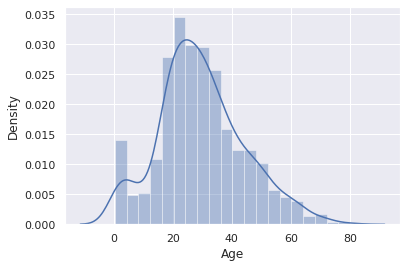

In [6]:
sns.distplot(dataTitanic['Age']) # it looks as normal distribution

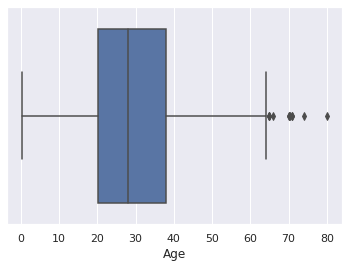

In [7]:
sns.boxplot(x='Age',data=dataTitanic)

the age is normally distributed so i will fill the NaN value is the median because it's robust to outlier

In [8]:
dataTitanic['Age'].fillna(dataTitanic['Age'].median(),inplace=True)

In [9]:
dataTitanic['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

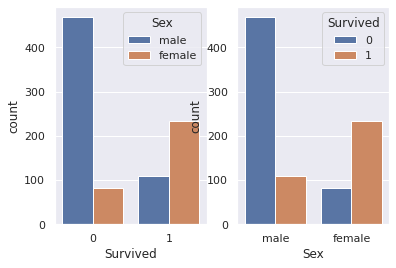

In [10]:
fig, axes = plt.subplots(1, 2)
sns.countplot(ax=axes[0],x='Survived',hue='Sex',data=dataTitanic)
sns.countplot(ax=axes[1],x='Sex',hue='Survived',data=dataTitanic)

In [11]:
dataTitanic[dataTitanic['Sex']=='female']['Survived'].sum()/dataTitanic[dataTitanic['Sex']=='female']['Survived'].count()

0.7420382165605095

In [12]:
dataTitanic[dataTitanic['Sex']=='male']['Survived'].sum()/dataTitanic[dataTitanic['Sex']=='male']['Survived'].count()

0.18890814558058924

based on the bar plot and the percentage of survived based on sex , we could know that female has more likely chance to survive

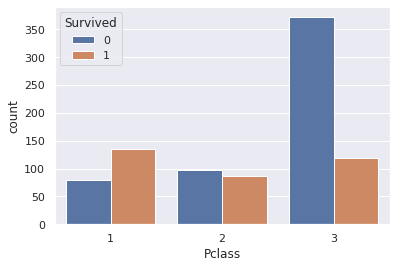

In [13]:
sns.countplot(x='Pclass',hue='Survived',data=dataTitanic)

In [14]:
dataTitanic['CabinIsNotNull'] = np.where(dataTitanic['Cabin'].isnull(),0,1)

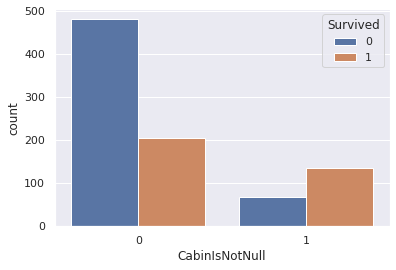

In [15]:
sns.countplot(x='CabinIsNotNull',hue='Survived',data=dataTitanic)

In [16]:
dataTitanic[dataTitanic['CabinIsNotNull']==0]['Survived'].sum()/dataTitanic[dataTitanic['CabinIsNotNull']==0]['Survived'].count()

0.29985443959243085

In [17]:
dataTitanic[dataTitanic['CabinIsNotNull']==1]['Survived'].sum()/dataTitanic[dataTitanic['CabinIsNotNull']==1]['Survived'].count()

0.6666666666666666

In [18]:
dataTitanic['Thereisfamily'] = np.logical_or(np.where(dataTitanic['Parch']>0,1,0),np.where(dataTitanic['SibSp']>0,1,0)).astype(int)

In [19]:
dataTitanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,CabinIsNotNull,Thereisfamily
0,0,3,male,22.0,1,0,7.2500,NaN,S,0,1
1,1,1,female,38.0,1,0,71.2833,C85,C,1,1
2,1,3,female,26.0,0,0,7.9250,NaN,S,0,0
3,1,1,female,35.0,1,0,53.1000,C123,S,1,1
4,0,3,male,35.0,0,0,8.0500,NaN,S,0,0


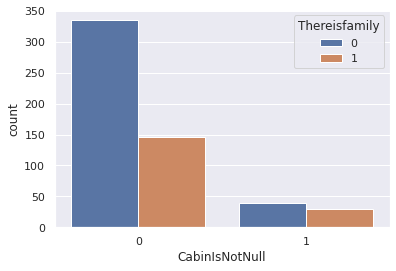

In [20]:
sns.countplot(x='CabinIsNotNull',hue='Thereisfamily',data=dataTitanic[dataTitanic['Survived']==0])

In [21]:
dataTitanic[dataTitanic['Thereisfamily']==1]['Survived'].sum()/dataTitanic[dataTitanic['Thereisfamily']==1]['Survived'].count()

0.5056497175141242

the missing of data is missing at random because it depends on the other column which is survived , parch and sibsp , the unsurvived person cant be indentified what cabin they stood at last , but there is 30% of unsurvived person can be identified where the last stood it could be because of they had family who survived (50% of 30% of unsurvived person can be identified where they last stood because they have family , so the unsurvived person who can't be identified is around 15%)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


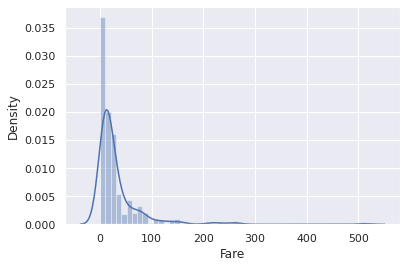

In [22]:
sns.distplot(dataTitanic['Fare']) # skewed 

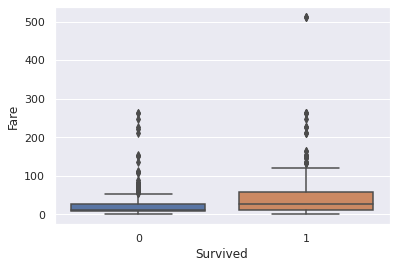

In [23]:
sns.boxplot(x='Survived',y='Fare',data=dataTitanic)

median survived is higher than not survived

In [24]:
dataTitanic['Fare'] = 1/(1+dataTitanic['Fare'])

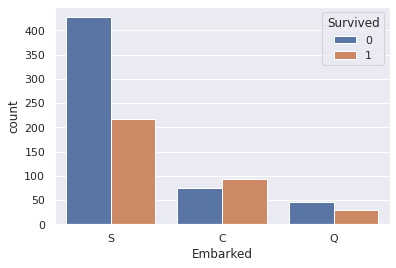

In [25]:
sns.countplot(x='Embarked',hue='Survived',data=dataTitanic)

In [26]:
dataTitanic[(dataTitanic['Fare']>0.011) & (dataTitanic['Fare']<0.0125)].sort_values(by='Fare')

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,CabinIsNotNull,Thereisfamily
453,1,1,male,49.0,1,0,0.011098,C92,C,1,1
849,1,1,female,28.0,1,0,0.011098,C92,C,1,1
759,1,1,female,33.0,0,0,0.011429,B77,S,1,0
504,1,1,female,16.0,0,0,0.011429,B79,S,1,0
257,1,1,female,30.0,0,0,0.011429,B77,S,1,0
62,0,1,male,45.0,1,0,0.011838,C83,S,1,1
230,1,1,female,35.0,1,0,0.011838,C83,S,1,1
879,1,1,female,56.0,0,1,0.011882,C50,C,1,1
835,1,1,female,39.0,1,1,0.011882,E49,C,1,1
310,1,1,female,24.0,0,0,0.011882,C54,C,1,0


i will fill the nan value in embarked as S because the neighbours are S(before and after)

In [27]:
dataTitanic['Fare'].fillna('S',inplace=True)

In [28]:
dataTitanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,CabinIsNotNull,Thereisfamily
0,0,3,male,22.0,1,0,0.121212,NaN,S,0,1
1,1,1,female,38.0,1,0,0.013834,C85,C,1,1
2,1,3,female,26.0,0,0,0.112045,NaN,S,0,0
3,1,1,female,35.0,1,0,0.018484,C123,S,1,1
4,0,3,male,35.0,0,0,0.110497,NaN,S,0,0


In [29]:
dataTitanic['Sex'] = dataTitanic['Sex'].map({'male':0,'female':1})

In [30]:
dataTitanic.drop(['SibSp','Parch','Cabin'],axis=1,inplace=True)

In [31]:
dataTitanic = pd.get_dummies(dataTitanic,drop_first=True)

i will use probability imputation here to remove NaN in embarked
i will use cabinIsNotNull , ThereisFamily and Survived while remove SibSp,Parch,Cabin

In [32]:
array = []
for i in range(dataTitanic.shape[0]):
  isSurvived = int(dataTitanic.iloc[i]['Survived'])
  isCabin = int(dataTitanic.iloc[i]['CabinIsNotNull'])
  isFamily = int(dataTitanic.iloc[i]['Thereisfamily'])
  PAB = dataTitanic[(dataTitanic['Survived']==isSurvived)&(dataTitanic['CabinIsNotNull']==isCabin)]['Survived'].count()/dataTitanic[dataTitanic['Survived']==isSurvived]['Survived'].count()
  PA = dataTitanic[dataTitanic['Survived']==isSurvived]['Survived'].count()/dataTitanic['Survived'].count()
  PB = dataTitanic[dataTitanic['CabinIsNotNull']==isCabin]['Survived'].count()/dataTitanic['Survived'].count()
  prob = PAB*PA/PB
  array.append(prob)
dataTitanic['prob'] = array

In [33]:
dataTitanic[(dataTitanic['Survived']==0)&(dataTitanic['CabinIsNotNull']==1)]

,Survived,Pclass,Sex,Age,Fare,CabinIsNotNull,Thereisfamily,Embarked_Q,Embarked_S,prob
6,0,1,0,54.0,0.018917,1,0,0,1,0.333333
27,0,1,0,19.0,0.003788,1,1,0,1,0.333333
54,0,1,0,65.0,0.015878,1,1,0,0,0.333333
62,0,1,0,45.0,0.011838,1,1,0,1,0.333333
75,0,3,0,25.0,0.115607,1,0,0,1,0.333333
...,...,...,...,...,...,...,...,...,...,...
789,0,1,0,46.0,0.012469,1,0,0,0,0.333333
806,0,1,0,39.0,1.000000,1,0,0,1,0.333333
815,0,1,0,28.0,1.000000,1,0,0,1,0.333333
867,0,1,0,31.0,0.019419,1,0,0,1,0.333333


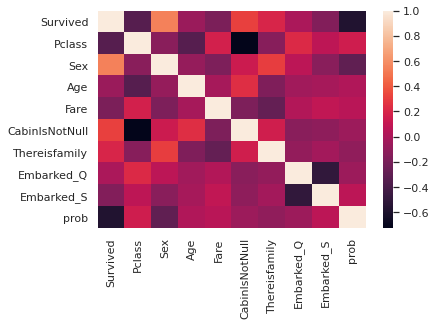

In [34]:
sns.heatmap(dataTitanic.corr())

In [35]:
dataTitanic.corr()

,Survived,Pclass,Sex,Age,Fare,CabinIsNotNull,Thereisfamily,Embarked_Q,Embarked_S,prob
Survived,1.000000,-0.338481,0.543351,-0.064910,-0.182865,0.316912,0.203367,0.003650,-0.155660,-0.570869
Pclass,-0.338481,1.000000,-0.131900,-0.339898,0.175479,-0.725541,-0.135207,0.221009,0.081720,0.151519
Sex,0.543351,-0.131900,1.000000,-0.081163,-0.173847,0.140391,0.303646,0.074115,-0.125722,-0.298673
Age,-0.064910,-0.339898,-0.081163,1.000000,-0.017008,0.240314,-0.171647,-0.031415,-0.014665,0.027229
Fare,-0.182865,0.175479,-0.173847,-0.017008,1.000000,-0.178616,-0.275866,0.031069,0.090720,0.062515
CabinIsNotNull,0.316912,-0.725541,0.140391,0.240314,-0.178616,1.000000,0.158029,-0.129572,-0.110087,-0.057963
Thereisfamily,0.203367,-0.135207,0.303646,-0.171647,-0.275866,0.158029,1.000000,-0.086464,-0.024929,-0.104308
Embarked_Q,0.003650,0.221009,0.074115,-0.031415,0.031069,-0.129572,-0.086464,1.000000,-0.496624,-0.052353
Embarked_S,-0.155660,0.081720,-0.125722,-0.014665,0.090720,-0.110087,-0.024929,-0.496624,1.000000,0.076445
prob,-0.570869,0.151519,-0.298673,0.027229,0.062515,-0.057963,-0.104308,-0.052353,0.076445,1.000000


In [36]:
X = dataTitanic[['Pclass','Sex','Fare','prob']]
Y = dataTitanic['Survived']

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split,cross_val_score

In [38]:
X_train ,x_test, Y_train ,y_test = train_test_split(X,Y,test_size=0.25)
log = LogisticRegression()
score = cross_val_score(log,X_train,Y_train,cv=5)
score

array([0.82089552, 0.76865672, 0.82089552, 0.87218045, 0.81954887])

In [39]:
score.mean()

0.8204354169004603